In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import sklearn.cluster as cluster
from matplotlib import pyplot as plt
import seaborn as sns
# magic incantation to help matplotlib work with our jupyter notebook
%matplotlib inline 

Для начала считываем данные о дифференциальной экспрессии генов в мозге мышей:

In [3]:
scaledcounts = pd.read_csv("C:/Users/57662/Downloads/brain_counts.csv")

In [40]:
scaledcounts.head()

,Unnamed: 0,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
0,A1.B003290.3_38_F.1.1,0,125,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,54,0
1,A1.B003728.3_56_F.1.1,0,0,0,0,0,324,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A1.MAA000560.3_10_M.1.1,0,348,0,0,0,5,0,0,0,...,0,0,0,0,0,195,0,0,113,0
3,A1.MAA000564.3_10_M.1.1,0,41,36,0,0,24,0,0,0,...,0,0,0,0,125,0,1,0,0,0
4,A1.MAA000923.3_9_M.1.1,0,53,0,0,0,0,0,0,0,...,0,0,0,81,0,0,0,0,0,0


Для определения числа кластеров воспользуемся elbow методом: Обучаем модели кластеризации k средних для разного количества кластеров и строим зависимость суммы квадратов расстояний от каждого элемента кластера до соответствующего центроида от колличества кластеров и находим точку изгиба графика, при этом колонку с кодовым именем нужно убрать - она не задает координату вектора.

In [70]:
K=range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(scaledcounts.drop(['Unnamed: 0'], axis=1))
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [71]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,2.750228e+14
1,2,1.372840e+14
2,3,8.236051e+13
3,4,5.845748e+13
4,5,4.646598e+13
5,6,4.025098e+13
6,7,3.645407e+13
7,8,3.344490e+13
8,9,3.106241e+13
9,10,2.935591e+13


<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

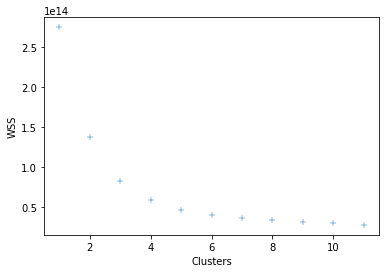

In [73]:
sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="+")

Четкого угла на гравфике не видно, но для начала можно взять n_clusters = 7.

In [4]:
km = KMeans(n_clusters = 7)
y_predict = km.fit_predict(scaledcounts.drop(['Unnamed: 0'], axis=1))
scaledcounts['cluster'] = y_predict
scaledcounts.head()

,Unnamed: 0,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,...,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene,cluster
0,A1.B003290.3_38_F.1.1,0,125,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,54,0,2
1,A1.B003728.3_56_F.1.1,0,0,0,0,0,324,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,A1.MAA000560.3_10_M.1.1,0,348,0,0,0,5,0,0,0,...,0,0,0,0,195,0,0,113,0,6
3,A1.MAA000564.3_10_M.1.1,0,41,36,0,0,24,0,0,0,...,0,0,0,125,0,1,0,0,0,2
4,A1.MAA000923.3_9_M.1.1,0,53,0,0,0,0,0,0,0,...,0,0,81,0,0,0,0,0,0,6


Попробуем визуализовать результать с помощью метода понижения размерности (Principal Component Analysis):

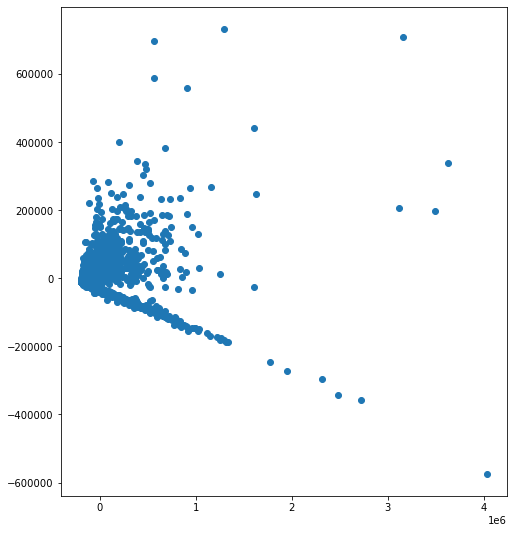

In [6]:
pca = PCA(n_components = 2)
pca.fit(scaledcounts.drop(['Unnamed: 0'], axis=1))
pca.explained_variance_ratio_
x_pca = pca.transform(scaledcounts.drop(['Unnamed: 0'], axis=1))
plt.figure(figsize=(8,9))
plt.scatter(x_pca[:,0],x_pca[:,1],)

Видно, что определить колличество кластеров без elbow метода было невозможно даже примерно. Тепрерь нужно покрасить точки и посмотреть, разделились ли точки по цвету

Добавляем столбец номеров кластеров к столбцам PC1 и PC2:

In [7]:
import numpy as np
np.insert(x_pca,2,y_predict,axis=1)

array([[-1.77407919e+05, -1.26224805e+04,  2.00000000e+00],
       [-1.57844598e+05, -1.87540143e+04,  2.00000000e+00],
       [ 1.60008048e+04,  8.16227401e+04,  6.00000000e+00],
       ...,
       [-1.73973674e+05, -1.33934616e+04,  2.00000000e+00],
       [-3.79441358e+04,  1.48549154e+04,  6.00000000e+00],
       [-1.78065952e+05, -1.30685856e+04,  2.00000000e+00]])

Преобразуем в более удобный дата фрейм:

In [8]:
df = pd.DataFrame(np.insert(x_pca,2,y_predict,axis=1)).rename(columns={2:'cluster'})
df

,0,1,cluster
0,-177407.918585,-12622.480521,2.0
1,-157844.597523,-18754.014280,2.0
2,16000.804816,81622.740094,6.0
3,-131256.837638,-18220.629932,2.0
4,-71464.649829,-25776.032998,6.0
...,...,...,...
3396,-93902.057094,-21945.110505,2.0
3397,-119573.873551,-6535.428472,2.0
3398,-173973.674041,-13393.461565,2.0
3399,-37944.135810,14854.915434,6.0


Рисуем раскрашенные точки

<Figure size 576x648 with 0 Axes>

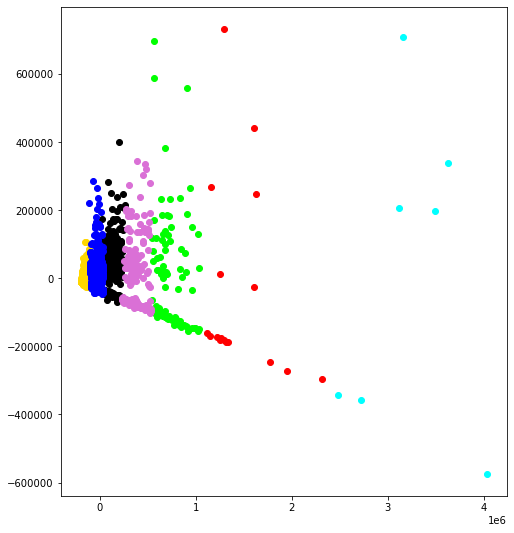

In [10]:
plt.figure(figsize=(8,9))
colors = ['black','red', 'gold', 'lime', 'cyan', 'orchid', 'b']

plt.figure(figsize=(8,9))
for i in range(7):
    sub_df = df.loc[df['cluster'] == i]
    plt.scatter(sub_df[0],sub_df[1], c = colors[i])

In [ ]:
Видно разделение точек по кластерам, разброс голубых и красных точек может быть побочным эффектом понижения размерности данных.